In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('hls', 10)
from tqdm import tqdm

In [2]:
N = 400
P = 10
NO_OF_BITS_TO_CHANGE = 300
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_ITERATIONS = 10

In [3]:
epsilon = np.asarray([np.random.choice([1, -1], size=N)])
for i in range(P-1):
    epsilon = np.append(epsilon, [np.random.choice([1, -1], size=N)], axis=0)

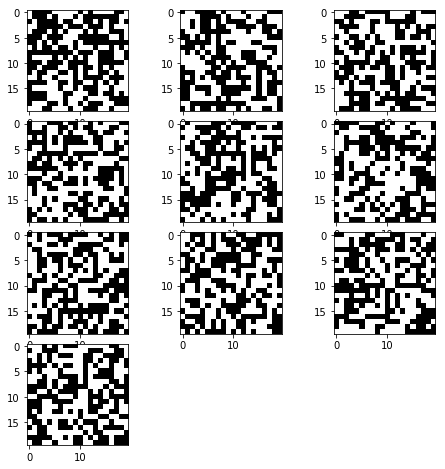

In [4]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

Pattern should converge to:  4


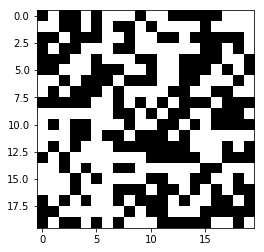

In [5]:
random_pattern = np.random.randint(P)
test_array = epsilon[random_pattern]
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test

print('Pattern should converge to: ', random_pattern+1)
plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

In [6]:
w = np.zeros((N, N))
h = np.zeros((N))
for i in tqdm(range(N)):
    for j in range(N):
        for p in range(P):
            w[i, j] += (epsilon[p, i]*epsilon[p, j]).sum()
        if i==j:
            w[i, j] = 0
w /= N
w

100%|██████████| 400/400 [00:04<00:00, 95.95it/s]


array([[ 0.   ,  0.   ,  0.005, ...,  0.005, -0.005,  0.005],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.005,  0.   ,  0.   , ..., -0.015, -0.005, -0.005],
       ...,
       [ 0.005,  0.   , -0.015, ...,  0.   ,  0.005,  0.015],
       [-0.005,  0.   , -0.005, ...,  0.005,  0.   ,  0.005],
       [ 0.005,  0.   , -0.005, ...,  0.015,  0.005,  0.   ]])

100%|██████████| 10/10 [00:00<00:00, 11.35it/s]


array([[200., 203., 198.,  67., 209., 188., 205., 206., 208., 216.],
       [197., 196., 189.,  26., 210., 193., 206., 201., 205., 205.],
       [201., 200., 189.,   8., 208., 189., 200., 209., 209., 205.],
       [199., 200., 189.,   2., 210., 185., 198., 207., 205., 205.],
       [200., 199., 190.,   1., 211., 186., 199., 206., 206., 206.],
       [201., 200., 191.,   0., 212., 187., 198., 205., 207., 205.],
       [201., 200., 191.,   0., 212., 187., 198., 205., 207., 205.],
       [201., 200., 191.,   0., 212., 187., 198., 205., 207., 205.],
       [201., 200., 191.,   0., 212., 187., 198., 205., 207., 205.],
       [201., 200., 191.,   0., 212., 187., 198., 205., 207., 205.]])

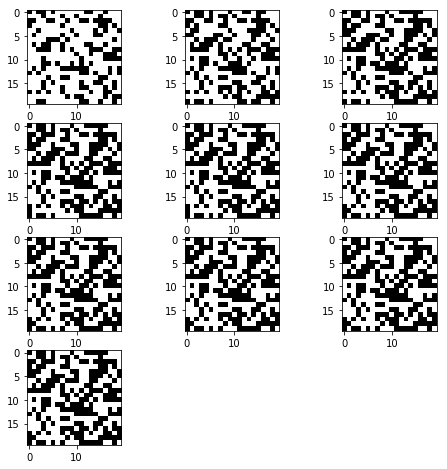

In [7]:
fig = plt.figure(figsize = (8, 8))
hamming_distance = np.zeros((NO_OF_ITERATIONS, P))
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array[j]
    test_array = np.where(h<0, -1, 1)
    for i in range(P):
        hamming_distance[iteration, i] = ((epsilon - test_array)[i]!=0).sum()
    plt.subplot(4, 3,iteration+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')
hamming_distance

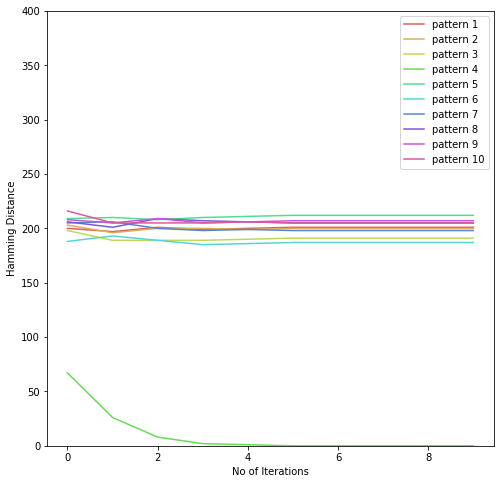

In [8]:
fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 400])
plt.legend(['pattern 1', 'pattern 2', 'pattern 3', 'pattern 4', 'pattern 5', 'pattern 6', 'pattern 7', 'pattern 8', 'pattern 9', 'pattern 10'],  loc='best')
plt.show()